In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#import nesseceary libraries from sklearn
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
#get data from csv
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
y = train_df["Survived"]
features = ["Pclass","SibSp","Sex","Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])


In [3]:
#Get the data from the model with sex in percent surviced more
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
train_df = pd.read_csv('train.csv')
labelencoder = LabelEncoder()
train_df.iloc[:,4] = labelencoder.fit_transform(train_df.iloc[:,4].values) #change sex from male female
# to 0 and 1 in case that we have bad data like female_sex and male_sex
print(train_df['Sex'].unique()) #check that all params has changed
y = train_df["Survived"]
features = ["Pclass","SibSp","Sex", "Parch"]



[1 0]


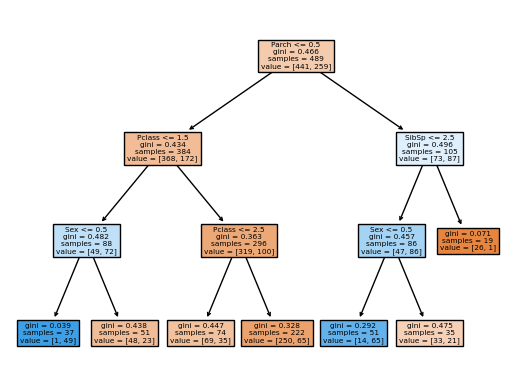

In [30]:
forest_random_model_1 = RandomForestClassifier(n_estimators=30,
                                               max_depth = 10,
                                               random_state=3,# no matter
                                              criterion = 'gini', # gini is the best ctiterion
                                              min_samples_split = 5,
                                               min_samples_leaf = 1, # 2 is the best score
                                               min_weight_fraction_leaf =0.0,
                                               max_features = 'sqrt', # if None then worse score
                                               max_leaf_nodes = 7,
                                               min_impurity_decrease = 0.0,
                                               bootstrap = True,
                                               warm_start = False, # no matter
                                               class_weight = None, # if none then better score
                                               max_samples = 700
                                              )
# Model (can also use single decision tree)



# Train
forest_random_model_1.fit(Xx, y)
# Extract single tree
_ = tree.plot_tree(forest_random_model_1.estimators_[0], feature_names=Xx.columns, filled=True)


F1 forest_random_model_1 score accuracy is 0.724025974025974 
F1 forest_random_model_2 score accuracy is 0.658493870402802 
F1 forest_random_model_3 score accuracy is 0.715008431703204 

Forest matrix is 
 [[489  60]
 [103 239]]
Testing Accuracy = "0.8092031425364759 !" and with score is 0.8092031425364759

Forest matrix is 
 [[489  60]
 [103 239]]
Testing Accuracy = "0.7811447811447811 !" and with score is 0.7811447811447811

Forest matrix is 
 [[489  60]
 [103 239]]
Testing Accuracy = "0.8103254769921436 !" and with score is 0.8103254769921436


[Text(0.5, 1.0, 'RandomForestClassifier with f1 score with min_samples_split')]

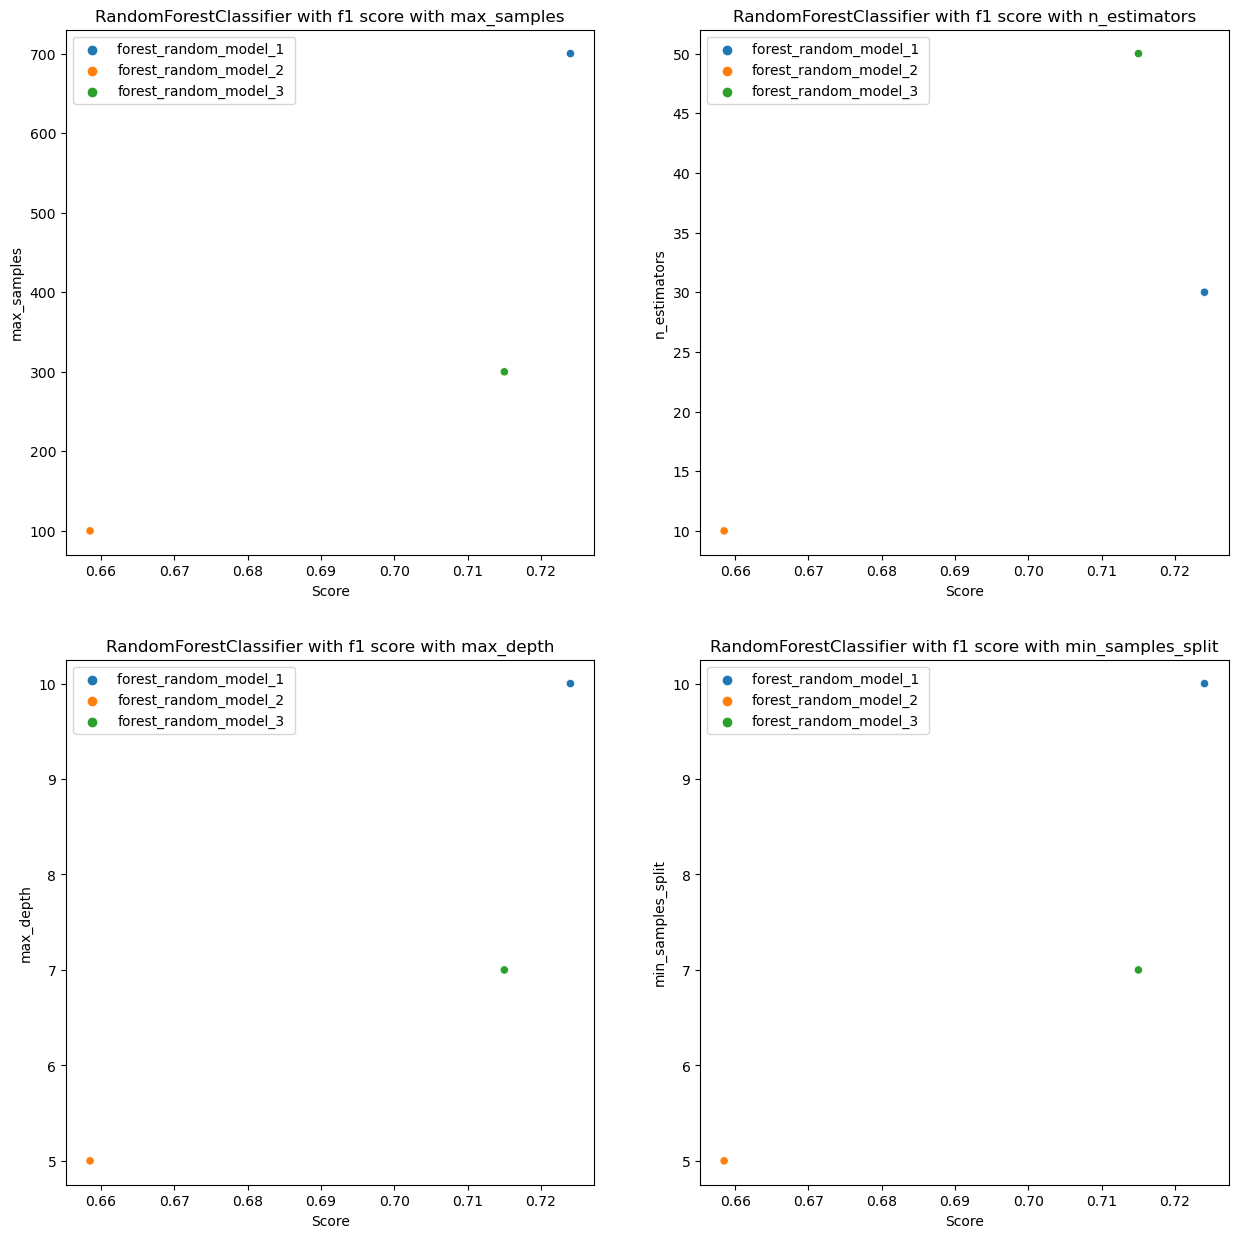

In [25]:
# Forest of randomly created decision trees
# n_estimators - count of trees in forest
# max_depth - the depth of the trees that mean the number of edges from the node to the 
#tree's root node. A root node will have a depth of 0.
# random_state - Controls the randomness of the estimator.

forest_random_model_1 = RandomForestClassifier(n_estimators=30,
                                               max_depth = 10,
                                               random_state=3,# no matter
                                              criterion = 'gini', # gini is the best ctiterion
                                              min_samples_split = 5,
                                               min_samples_leaf = 1, # 2 is the best score
                                               min_weight_fraction_leaf =0.0,
                                               max_features = 'sqrt', # if None then worse score
                                               max_leaf_nodes = 7,
                                               min_impurity_decrease = 0.0,
                                               bootstrap = True,
                                               warm_start = False, # no matter
                                               class_weight = None, # if none then better score
                                               max_samples = 700
                                              )

forest_random_model_2 = RandomForestClassifier(n_estimators=10,
                                               max_depth=5, 
                                               random_state=3,
                                              criterion = 'gini',
                                              min_samples_split = 15, 
                                               min_samples_leaf = 5,
                                               min_weight_fraction_leaf = 0.0,
                                               max_features = 'sqrt',
                                               max_leaf_nodes = 7, # after 7 there is no difference
                                               min_impurity_decrease = 0.0, # if >0 then worse score
                                               bootstrap = True,# if true then better score
                                               warm_start = False,
                                               class_weight = None,
                                               max_samples = 100 # 
                                              )

forest_random_model_3 = RandomForestClassifier(n_estimators=50, 
                                               max_depth=7, 
                                               random_state=3,
                                              criterion = 'gini',
                                              min_samples_split = 30, 
                                               min_samples_leaf = 2,
                                               min_weight_fraction_leaf = 0.0,
                                               max_features = 'log2',
                                               max_leaf_nodes = 7,
                                               min_impurity_decrease = 0.00,
                                               bootstrap = True,
                                               warm_start = False,
                                               class_weight = None,
                                               max_samples = 300
                                              )


forest_random_model_1.fit(Xx, y)
forest_random_model_2.fit(Xx, y)
forest_random_model_3.fit(Xx, y)


print("F1 forest_random_model_1 score accuracy is {} ".format(f1_score(y,forest_random_model_1.predict(Xx))))
print("F1 forest_random_model_2 score accuracy is {} ".format(f1_score(y,forest_random_model_2.predict(Xx))))
print("F1 forest_random_model_3 score accuracy is {} ".format(f1_score(y,forest_random_model_3.predict(Xx))))

cm_forest_1 = confusion_matrix(y, forest_random_model.predict(Xx)) 
cm_forest_2 = confusion_matrix(y, forest_random_model.predict(Xx)) 
cm_forest_3 = confusion_matrix(y, forest_random_model.predict(Xx)) 

print("\nForest matrix is \n {}".format(cm_forest_1))
TN, FP, FN, TP = confusion_matrix(y, forest_random_model_1.predict(Xx)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,forest_random_model_1.score(Xx,y) ) )
print("\nForest matrix is \n {}".format(cm_forest_2))
TN, FP, FN, TP = confusion_matrix(y, forest_random_model_2.predict(Xx)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,forest_random_model_2.score(Xx,y) ) )
print("\nForest matrix is \n {}".format(cm_forest_3))
TN, FP, FN, TP = confusion_matrix(y, forest_random_model_3.predict(Xx)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,forest_random_model_3.score(Xx,y) ) )

data_forest_samples = [[f1_score(y,forest_random_model_1.predict(Xx)),forest_random_model_1.max_samples],
       [f1_score(y,forest_random_model_2.predict(Xx)),forest_random_model_2.max_samples],
       [f1_score(y,forest_random_model_3.predict(Xx)),forest_random_model_3.max_samples]]

data_forest_estimators = [[f1_score(y,forest_random_model_1.predict(Xx)),forest_random_model_1.n_estimators],
       [f1_score(y,forest_random_model_2.predict(Xx)),forest_random_model_2.n_estimators],
       [f1_score(y,forest_random_model_3.predict(Xx)),forest_random_model_3.n_estimators]]

data_forest_depth = [[f1_score(y,forest_random_model_1.predict(Xx)),forest_random_model_1.max_depth],
       [f1_score(y,forest_random_model_2.predict(Xx)),forest_random_model_2.max_depth],
       [f1_score(y,forest_random_model_3.predict(Xx)),forest_random_model_3.max_depth]]

data_forest_split = [[f1_score(y,forest_random_model_1.predict(Xx)),forest_random_model_1.min_samples_split],
       [f1_score(y,forest_random_model_2.predict(Xx)),forest_random_model_2.min_samples_split],
       [f1_score(y,forest_random_model_3.predict(Xx)),forest_random_model_3.min_samples_split]]



df_forest_samples = pd.DataFrame(data_forest_samples,index = 
                  ['forest_random_model_1 ','forest_random_model_2',
                   'forest_random_model_3'],columns = ['Score','max_samples'])

df_forest_estimators = pd.DataFrame(data_forest_estimators,index = 
                  ['forest_random_model_1 ','forest_random_model_2',
                   'forest_random_model_3'],columns = ['Score','n_estimators'])

df_forest_depth = pd.DataFrame(data_forest_depth,index = 
                  ['forest_random_model_1 ','forest_random_model_2',
                   'forest_random_model_3'],columns = ['Score','max_depth'])

df_forest_split = pd.DataFrame(data_forest_depth,index = 
                  ['forest_random_model_1 ','forest_random_model_2',
                   'forest_random_model_3'],columns = ['Score','min_samples_split'])





fig , axes = plt.subplots(2, 2 ,figsize=(15, 15) )

sns.scatterplot(data=df_forest_samples,
                x='Score', y='max_samples',hue = df_forest_samples.index ,
                ax=axes[0,0]).set( title='RandomForestClassifier with f1 score with max_samples')




sns.scatterplot(data=df_forest_estimators,
                x='Score', y='n_estimators',hue = df_forest_estimators.index,
                ax=axes[0,1]).set( title='RandomForestClassifier with f1 score with n_estimators')


sns.scatterplot(data=df_forest_depth,
                x='Score', y='max_depth',hue = df_forest_depth.index,
                ax=axes[1,0]).set( title='RandomForestClassifier with f1 score with max_depth')


sns.scatterplot(data=df_forest_split,
                x='Score', y='min_samples_split',hue = df_forest_split.index,
                ax=axes[1,1]).set( title='RandomForestClassifier with f1 score with min_samples_split')






# as we see the best combination of paramets that really worth is model number 3

In [25]:
print(log.C)

1.0


0.7833894500561167
F1 log_1 score accuracy is 0.6065259117082533 
F1 log_2 score accuracy is 0.7081081081081082 
F1 log_3 score accuracy is 0.6365348399246704 

Log  matrix is 
 [[528  21]
 [184 158]]
Testing Accuracy = "0.7699214365881033 !" and with score is 0.7699214365881033

Log  matrix is 
 [[413 136]
 [ 80 262]]
Testing Accuracy = "0.7575757575757576 !" and with score is 0.7575757575757576

Log  matrix is 
 [[529  20]
 [173 169]]
Testing Accuracy = "0.7833894500561167 !" and with score is 0.7833894500561167


D:\AnaCCCCONDA\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Text(0.5, 1.0, 'DecisionTreeClassifier with default score')]

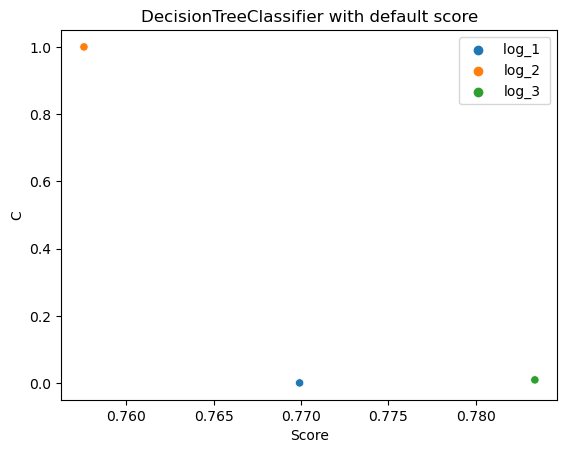

In [31]:
# The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
#     ‘lbfgs’ - [‘l2’, None]
#     ‘liblinear’ - [‘l1’, ‘l2’]
#     ‘newton-cg’ - [‘l2’, None]
#     ‘newton-cholesky’ - [‘l2’, None]
#     ‘sag’ - [‘l2’, None]
#     ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

log = LogisticRegression(tol = 0.001,
                         C = 0.01
                         
)
log.fit(X,y)
print(log.score(X ,y))
log_1 = LogisticRegression(random_state = 10,
                           dual = False,
                           tol = 1,
                           C = 0.001,
                           fit_intercept = False,
                           intercept_scaling = 1,
                           class_weight = 'balanced',
                           solver = 'lbfgs',
                           max_iter = 100000,
                           multi_class = 'ovr',
#                            verbose = 40,
                           warm_start = False,
#                            n_jobs = -1,
                           l1_ratio = None
                          )

log_2 = LogisticRegression(random_state = 100,
                           dual = False,
                           tol = 0.1,
                           C = 1,
                           fit_intercept = True,
                           intercept_scaling = 100,
                           class_weight = 'balanced',
                           solver = 'liblinear',
                           max_iter = 100,
                           multi_class = 'auto',
                           verbose = 0,
                           warm_start = True,
                           n_jobs = None,
                           l1_ratio = None
                          )

log_3 = LogisticRegression(penalty = 'elasticnet',
                           random_state = 0,
                           dual = False,
                           tol = 0,
                           C = 0.01,
                           fit_intercept = True,
                           intercept_scaling = 1,
                           class_weight = None,
                           solver = 'saga',
                           max_iter = 10,
                           multi_class = 'auto',
                           verbose = 0,
                           warm_start = False,
                           n_jobs = None,
                           l1_ratio = 0
                          )

#linear model for classification rather than regression.statistical method for binary 
#classification that can be generalized to multiclass classification. 
log_1.fit(X,y)
log_2.fit(X,y)
log_3.fit(X,y)

# predictions = log_1.predict(X)
# classification_report(y,predictions)
print("F1 log_1 score accuracy is {} ".format(f1_score(y,log_1.predict(X))))
print("F1 log_2 score accuracy is {} ".format(f1_score(y,log_2.predict(X))))
print("F1 log_3 score accuracy is {} ".format(f1_score(y,log_3.predict(X))))


cm_log_1 = confusion_matrix(y, log_1.predict(X)) 
print("\nLog  matrix is \n {}".format(cm_log_1))
TN, FP, FN, TP = confusion_matrix(y, log_1.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,log_1.score(X,y) ) )
cm_log_2 = confusion_matrix(y, log_2.predict(X)) 
print("\nLog  matrix is \n {}".format(cm_log_2))
TN, FP, FN, TP = confusion_matrix(y, log_2.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,log_2.score(X,y) ) )
cm_log_3 = confusion_matrix(y, log_3.predict(X)) 
print("\nLog  matrix is \n {}".format(cm_log_3))
TN, FP, FN, TP = confusion_matrix(y, log_3.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,log_3.score(X,y) ) )

data_C = [[log_1.score(X,y),log_1.C],
       [log_2.score(X,y),log_2.C],
       [log_3.score(X,y),log_3.C]]



df_min_leaf = pd.DataFrame(data_C,index = 
                  ['log_1 ','log_2','log_3'],columns = ['Score','C'])





sns.scatterplot(data = df_min_leaf, x='Score', y = 'C' , 
                         hue = df_min_leaf.index).set(title='DecisionTreeClassifier with default score')

# All params depends only on type of solver + uniq params for this solver

In [ ]:
#                                       ATTENTION 
#                          THIS MODEL IS DANGEROUS AND BREAK MY LAPTOP SO 
#                          I NEED TO MAKE HARD REBOOT

log_1 = LogisticRegression(random_state = 10,
                           dual = True,
                           tol = 100,
                           C = 1000000,
                           fit_intercept = False,
                           intercept_scaling = 100000,
                           class_weight = 'balanced',
                           solver = 'liblinear',
                           max_iter = 1000000,
                           multi_class = 'ovr',
                           verbose = 200,
                           warm_start = False,
                           n_jobs = 20,
                           l1_ratio = 1
                          )
log_1.fit(X,y)
log_1.score(X,y)

F1 dec_tree score accuracy is 0.7171717171717171 
F1 dec_tree_2 score accuracy is 0.7103658536585367 
F1 dec_tree_3 score accuracy is 0.7321428571428571 

Dec_Tree matrix is 
 [[510  39]
 [129 213]]
Testing Accuracy = "0.8114478114478114 !" and with score is 0.8114478114478114

Dec_Tree_2 matrix is 
 [[468  81]
 [109 233]]
Testing Accuracy = "0.7867564534231201 !" and with score is 0.7867564534231201

Dec_Tree_3 matrix is 
 [[465  84]
 [ 96 246]]
Testing Accuracy = "0.797979797979798 !" and with score is 0.797979797979798


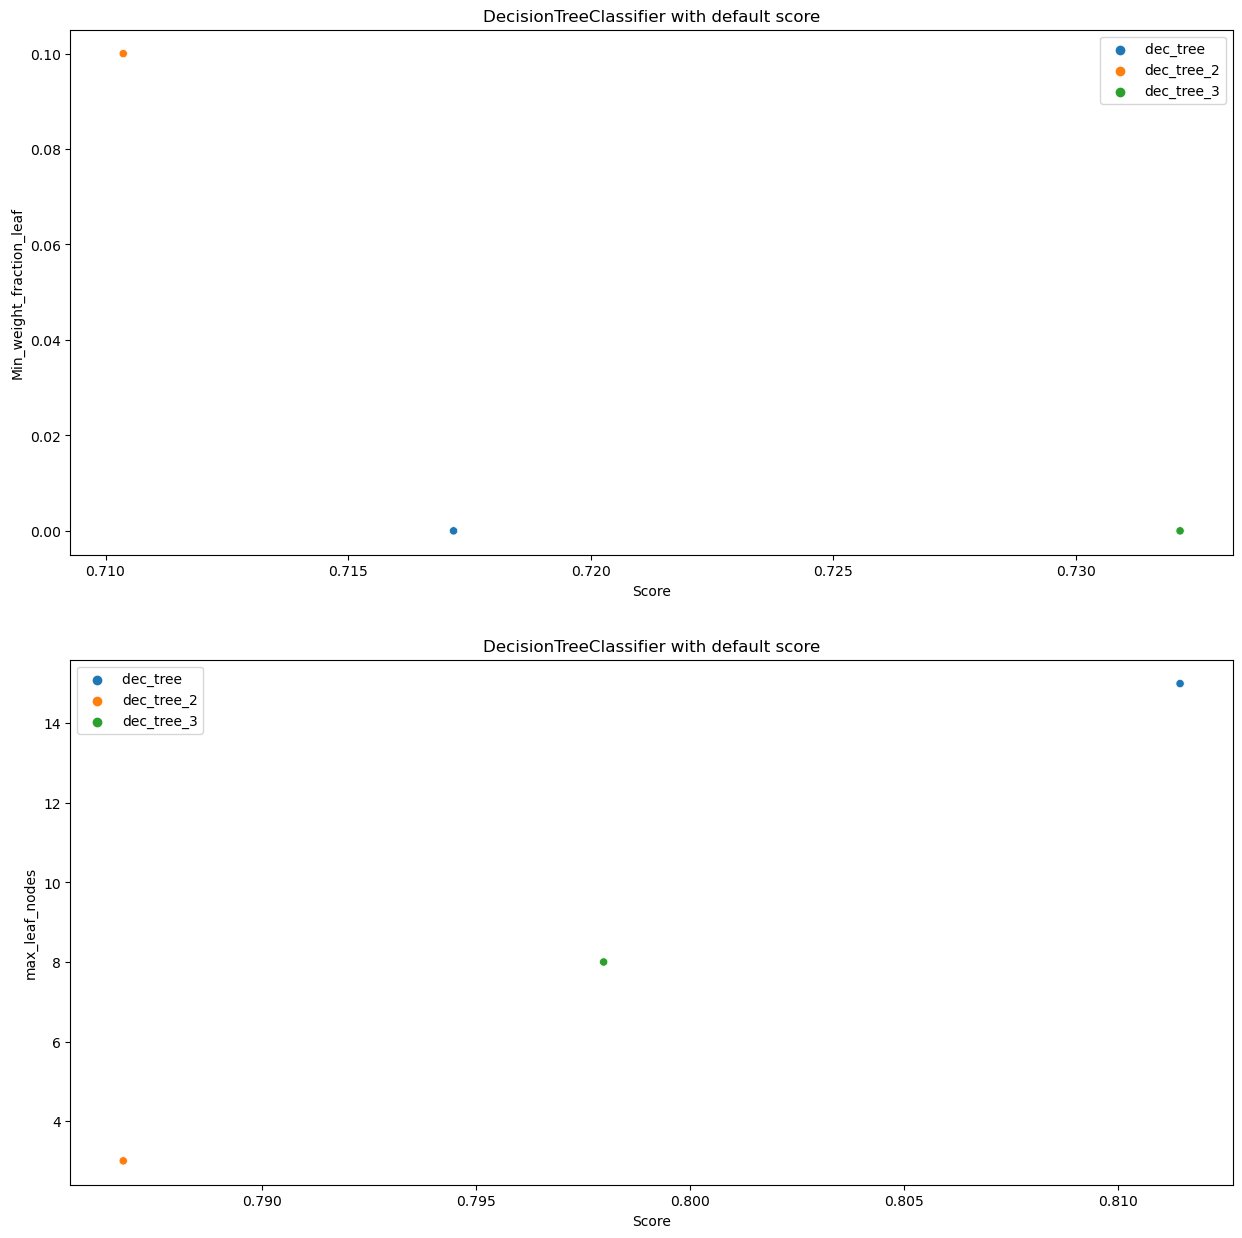

In [6]:
#first will be Decision Tree classificator
dec_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  splitter = 'best',
                                  min_samples_split = 2,
                                  random_state = 0,
                                  max_depth = 17,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0.0,
                                 max_leaf_nodes = 15,
                                 min_impurity_decrease = 0.0,
                                 ccp_alpha = 0.0)



dec_tree_2 = DecisionTreeClassifier(criterion = 'entropy',
                                    splitter = 'best',
                                    min_samples_split = 2,
                                    random_state = 0,
                                    max_depth = 7,
                                    min_samples_leaf = 1,
                                    min_weight_fraction_leaf = 0.1,
#                                     max_features = 'log2',
                                    max_leaf_nodes = 3,
                                    min_impurity_decrease = 0.00,
                                    class_weight = 'balanced',
                                    ccp_alpha = 0.0)

dec_tree_3 = DecisionTreeClassifier(criterion = 'gini',
                                    splitter = 'best',
                                    min_samples_split = 2,
                                    random_state = 0,
                                    max_depth = 3,
                                    min_samples_leaf = 1,
                                    min_weight_fraction_leaf = 0.0,
                                    max_leaf_nodes = 8,
                                    min_impurity_decrease = 0.00,
                                    class_weight = 'balanced',
                                    ccp_alpha = 0.0)




# DecisionTree is CART algorithm: Classification and Regression Tree.
# there are 3 criterion:
# entropy , gini , log_loss.The function to measure the quality of a split. 
# As we can see there is no difference in results between gini and entropy
# random state - Controls the randomness of the estimator

# fit an estimator to be able to predict the classes to which unseen samples belong.
dec_tree.fit(X, y)
dec_tree_2.fit(X,y)
dec_tree_3.fit(X,y)


cm_dec_tree = confusion_matrix(y, dec_tree.predict(X))  
cm_dec_tree_2 = confusion_matrix(y, dec_tree_2.predict(X)) 
cm_dec_tree_3 = confusion_matrix(y, dec_tree_3.predict(X)) 


print("F1 dec_tree score accuracy is {} ".format(f1_score(y,dec_tree.predict(X))))
print("F1 dec_tree_2 score accuracy is {} ".format(f1_score(y,dec_tree_2.predict(X))))
print("F1 dec_tree_3 score accuracy is {} ".format(f1_score(y,dec_tree_3.predict(X))))

print("\nDec_Tree matrix is \n {}".format(cm_dec_tree))
TN, FP, FN, TP = confusion_matrix(y, dec_tree.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree.score(X,y) ) )

print("\nDec_Tree_2 matrix is \n {}".format(cm_dec_tree_2))
TN, FP, FN, TP = confusion_matrix(y, dec_tree_2.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree_2.score(X,y) ) )

print("\nDec_Tree_3 matrix is \n {}".format(cm_dec_tree_3))
TN, FP, FN, TP = confusion_matrix(y, dec_tree_3.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree_3.score(X,y) ) )


data = [[f1_score(y,dec_tree.predict(X)),dec_tree.min_weight_fraction_leaf],
       [f1_score(y,dec_tree_2.predict(X)),dec_tree_2.min_weight_fraction_leaf],
       [f1_score(y,dec_tree_3.predict(X)),dec_tree_3.min_weight_fraction_leaf]]

data_cpp = [[dec_tree.score(X,y),dec_tree.max_leaf_nodes],
           [dec_tree_2.score(X,y),dec_tree_2.max_leaf_nodes],
           [dec_tree_3.score(X,y),dec_tree_3.max_leaf_nodes]]

df_min_leaf = pd.DataFrame(data,index = 
                  ['dec_tree ','dec_tree_2','dec_tree_3'],columns = ['Score','Min_weight_fraction_leaf',])

df_ccp = pd.DataFrame(data_cpp, index = 
                      ['dec_tree ','dec_tree_2','dec_tree_3'],columns = ['Score','max_leaf_nodes',])

# sns.set(rc={"figure.figsize":(16, 4)})
# gf = sns.scatterplot(data=df, x='Score', y='Min_weight_fraction_leaf',hue=df.index ).set(title='DecisionTreeClassifier with f1_score metric ')

fig , axes = plt.subplots(2 , figsize=(15, 15) )


gf_ccp = sns.scatterplot(data = df_min_leaf, x='Score', y = 'Min_weight_fraction_leaf' , 
                         hue = df.index,ax=axes[0]).set(title='DecisionTreeClassifier with default score')

gf_ccp = sns.scatterplot(data = df_ccp, x='Score', y = 'max_leaf_nodes' , 
                         hue = df.index,ax=axes[1]).set(title='DecisionTreeClassifier with default score')





In [25]:
gauss_1.var_smoothing 

1e-09

F1 gauss score accuracy is 0.7210031347962382 

Gauss matrix is 
 [[483  66]
 [112 230]]
Testing Accuracy = "0.8002244668911336 !" and with score is 0.8002244668911336


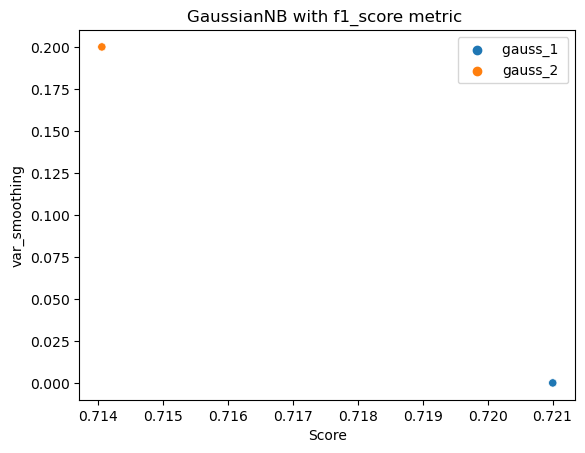

In [29]:
gauss_1= GaussianNB( ) #var_smoothing default = 1e-9
gauss_2 = GaussianNB(
                   var_smoothing = 0.2 )

#GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 
#The likelihood of the features is assumed to be Gaussian:

gauss_1.fit(X, y)
gauss_2.fit(X, y)

print("F1 gauss score accuracy is {} ".format(f1_score(y,gauss_1.predict(X))))
cm_gauss = confusion_matrix(y, gauss_1.predict(X)) 
print("\nGauss matrix is \n {}".format(cm_gauss))
TN, FP, FN, TP = confusion_matrix(y, gauss_1.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,gauss_1.score(X,y) ) )

data = [[f1_score(y,gauss_1.predict(X)),gauss_1.var_smoothing],
       [f1_score(y,gauss_2.predict(X)),gauss_2.var_smoothing]]


df = pd.DataFrame(data,index = 
                  ['gauss_1 ','gauss_2'],columns = ['Score','var_smoothing',])



gf = sns.scatterplot(data=df, x='Score', y='var_smoothing',hue=df.index ).set(title='GaussianNB with f1_score metric ')






In [20]:
#let us see what params are actually important to us
train_df = pd.read_csv('train.csv')
labelencoder = LabelEncoder()
train_df.iloc[:,4] = labelencoder.fit_transform(train_df.iloc[:,4].values) #change sex from male female
# to 0 and 1 in case that we have bad data like female_sex and male_sex
print(train_df['Sex'].unique()) #check that all params has changed
y = train_df["Survived"]
features = ["Pclass","SibSp","Sex", "Parch"]
Xx = pd.get_dummies(train_df[features])
forest_random_model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=3)
forest_random_model.fit(Xx, y)
importances = pd.DataFrame({'feature':Xx.columns,'importance':
                            np.round(forest_random_model.feature_importances_,3)})


importances = importances.sort_values('importance',ascending=False).set_index('feature')# sort 
#data in ascending order
importances
#we descovered that sex of a man is the most important thing in our model

[1 0]


,importance
feature,
Sex,0.579
Pclass,0.225
Parch,0.103
SibSp,0.092
